# Building a Handwritten Digits Classifier

In this project, we'll build models that can classify handwritten digits. We'll explore image classification, observe the limitations of traditional machine learning models for image classification, and improve some neural networks for image classification. 

## Working with Image Data

Skikit-learn comes pre-loaded with some datasets. We'll use the `load_digits()` function to return a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
labels = pd.Series(digits['target'])
data = pd.DataFrame(digits['data']) # Transforming the NumPy 2D array into a pandas dataframe
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


## Visualizing Some Images in the Dataset

We'll be using the [`axes.imshow()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html?highlight=axes%20imshow#matplotlib.axes.Axes.imshow) function to display multiple images in one matplotlib figure.

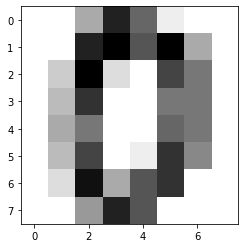

In [5]:
image_one = data.iloc[0]
np_image = image_one.values
np_image = np_image.reshape(8,8) # Reshaping the image so that we can view it

plt.imshow(np_image, cmap='gray_r')

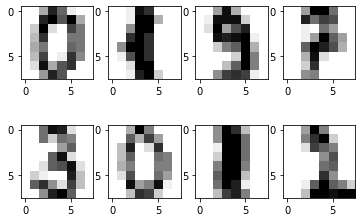

In [6]:
f, axarr = plt.subplots(2, 4) # axarr = axes array

# Displaying the images corresponding to rows 0, 100, 200, and 300
axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

# Displaying the images corresponding to rows 1000, 1100, 1200, and 1300
axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [ ]:
While linear and logistic regression models make assumptions about the linearity between the features and the
output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity
in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred
to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some
implementations constrain the search space) training observations to look for similar (or the "nearest")
observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the
prediction for the unseen observation.

Recall that you can use the KNeighborsClassifier package to train and test k-nearest neighbors models.
Instructions

Split up the data into train and test sets.
Setup a pipeline for testing and training k-nn models.
Write a function named train() that uses KNeighborsClassifer for training k-nearest neighbors models.
Write a function named test() that tests the model.
Write a function named cross_validate() that performs 4-fold cross validation using train() and test().
Experiment with different values for k and plot the resulting classification accuracies.

## K-Nearest Neighbors Algorithm

The k-nearest neighbors algorithm will compare all images in the test set to all images in the training set and look for similar images. Then the algorithm will find the label with the "nearest" images and assign that as the prediction.

We'll use the `KNeighborsClassifier` package to train and test our model.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Creating the training set and test set out of our data
def train_knn(num_neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = num_neighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

knn_one_accuracy = cross_validate(1)
np.mean(knn_one_accuracy)

0.9677233358079684

In [13]:
knn_three_accuracy = cross_validate(3)
np.mean(knn_three_accuracy)

0.9627183865379857

In [15]:
knn_ten_accuracy = cross_validate(10)
np.mean(knn_ten_accuracy)

0.9527097253155159

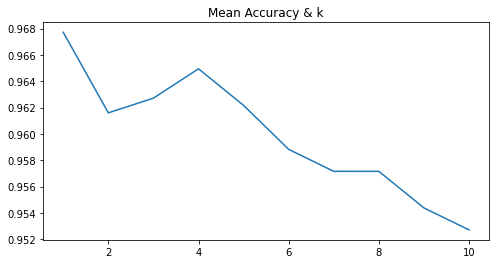

In [16]:
k_values = list(range(1,11)) # Testing multiple values of k for best accuracy
k_accuracy = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_accuracy.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy & k')
plt.plot(k_values, k_accuracy)

## Neural Network with One Hidden Layer

There are some downsides when using k-nearest neighbors. Many comparisons need to be made between the unseen images and the already seen images, so it uses a lot of memory. There's also no easy way to debug and explore.

Next we'll try using a neural network with just a single hidden layer. We can do this by using the `MLPClassifier` package from scikit-learn. We'll test out this network using hidden layers of 8, 16, 32, 64, 128, and 256 neurons and see which models have the best accuracy and where the models start to overfit.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = train_nn(neuron_arch, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

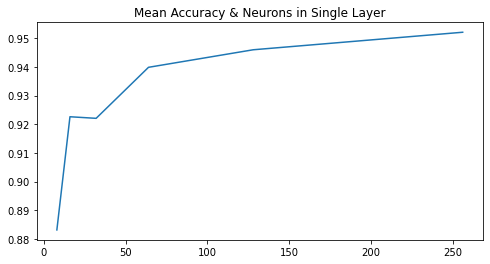

In [21]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

nn_one_accuracy = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracy.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy & Neurons in Single Hidden Layer')

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

For our single hidden layer neural network, it's clear that adding more neurons significantly helped improve our accuracy. This doesn't tell us anything about false or true positives and negatives. In out k-nearest neighbors algorithm, we acheive approximately 96% accuracy, so there doesn't seem to be any advantage to using a NN with just one hidden layer.

## Neural Network with Two Hidden Layers

Next, we'll test out adding more layers to our nerual network to see if we can improve our accuracy. We will just modify the neural network to use 2 hidden layers with 64, 128, and 256 neurons in each layer.

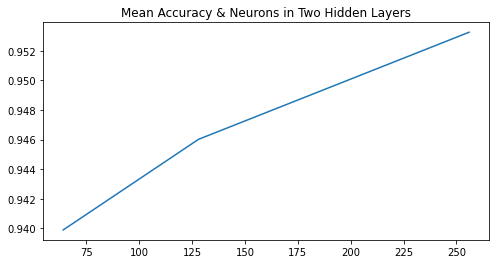

In [22]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]

nn_two_accuracy = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracy.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))    
plt.title('Mean Accuracy & Neurons in Two Hidden Layers')    
    
x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracy)